### Introduction
###
This project looks at patient health data to predict who's likely to survive. We'll clean and prep the data here, getting it ready for the next step—building the prediction models

### Data Wrangling and EDA

In [21]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Loading the dataset
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [23]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [25]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [26]:
#cleaning the data
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [27]:
data = data.dropna()
data = data.drop_duplicates()

In [28]:
#converting to pandas dataframe and reseting the index
df = pd.DataFrame(data)
df = df.reset_index(drop=True)

In [29]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


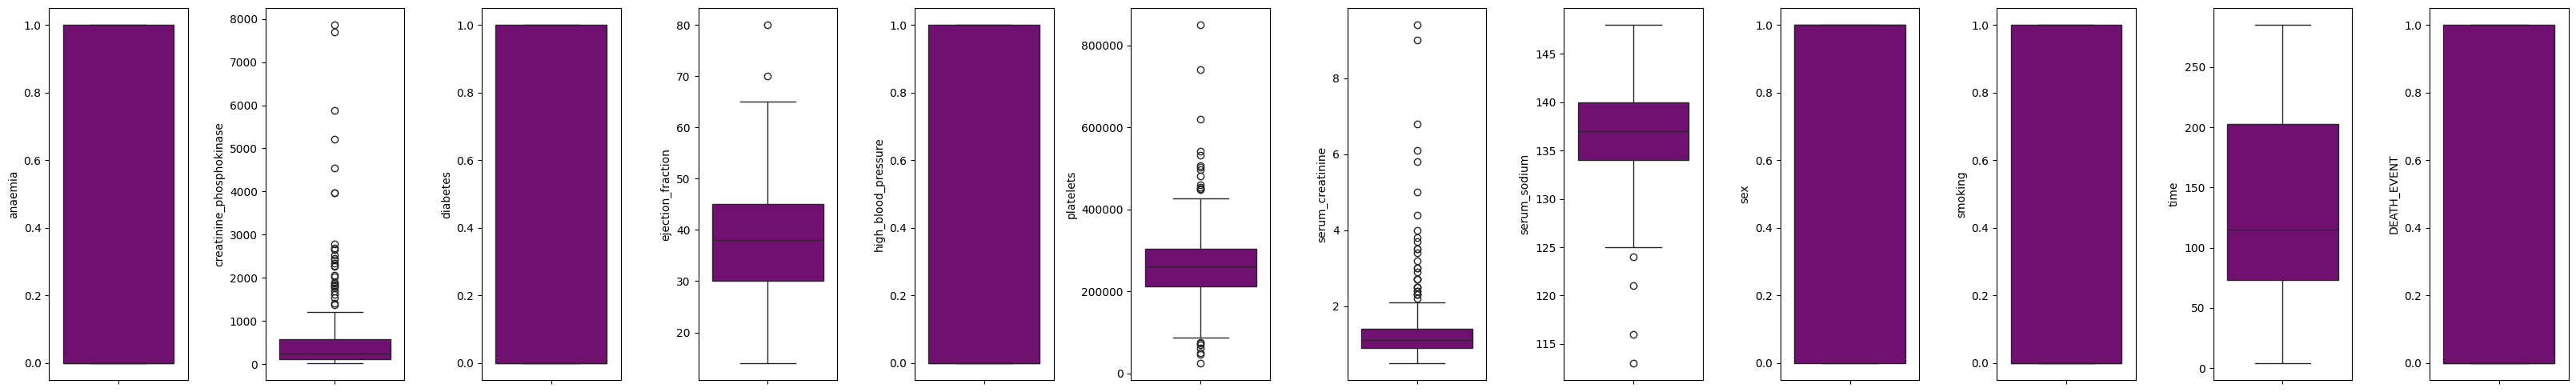

In [30]:
#checking for outliers
columns = df.columns

plt.figure(figsize=(35, 5))
for i in range(1, len(columns)):
    plt.subplot(1, 13, i)
    sns.boxplot(df[columns[i]], color='purple', orient='v')
    plt.tight_layout()




In [31]:
df.shape

(299, 13)

In [32]:
#optional. This code will remove all outliers but, With removing all outliers accuracy will be much lower
'''#removing outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]'''

#removing outliers only for "ejection_fraction", 'creatinine_phosphokinase', "serum_sodium" and 'serum_creatinine'. The Rest of the data point in other columns we will keep due to importance of data.

Q1_et = df['ejection_fraction'].quantile(0.25)
Q3_et = df['ejection_fraction'].quantile(0.75)
IQR_et = Q3_et - Q1_et
df = df[~((df['ejection_fraction'] < (Q1_et - 1.5 * IQR_et)) | (df['ejection_fraction'] > (Q3_et + 1.5 * IQR_et)))]

Q1_ss = df['serum_sodium'].quantile(0.25)
Q3_ss = df['serum_sodium'].quantile(0.75)
IQR_ss = Q3_ss - Q1_ss 
df = df[~((df['serum_sodium'] < (Q1_ss - 1.5 * IQR_ss)) | (df['serum_sodium'] > (Q3_ss + 1.5 * IQR_ss)))]

Q1_sc = df['serum_creatinine'].quantile(0.25)  
Q3_sc = df['serum_creatinine'].quantile(0.75)
IQR_sc = Q3_sc - Q1_sc
df = df[~((df['serum_creatinine'] < (Q1_sc - 1.5 * IQR_sc)) | (df['serum_creatinine'] > (Q3_sc + 1.5 * IQR_sc)))]

df.shape

(266, 13)

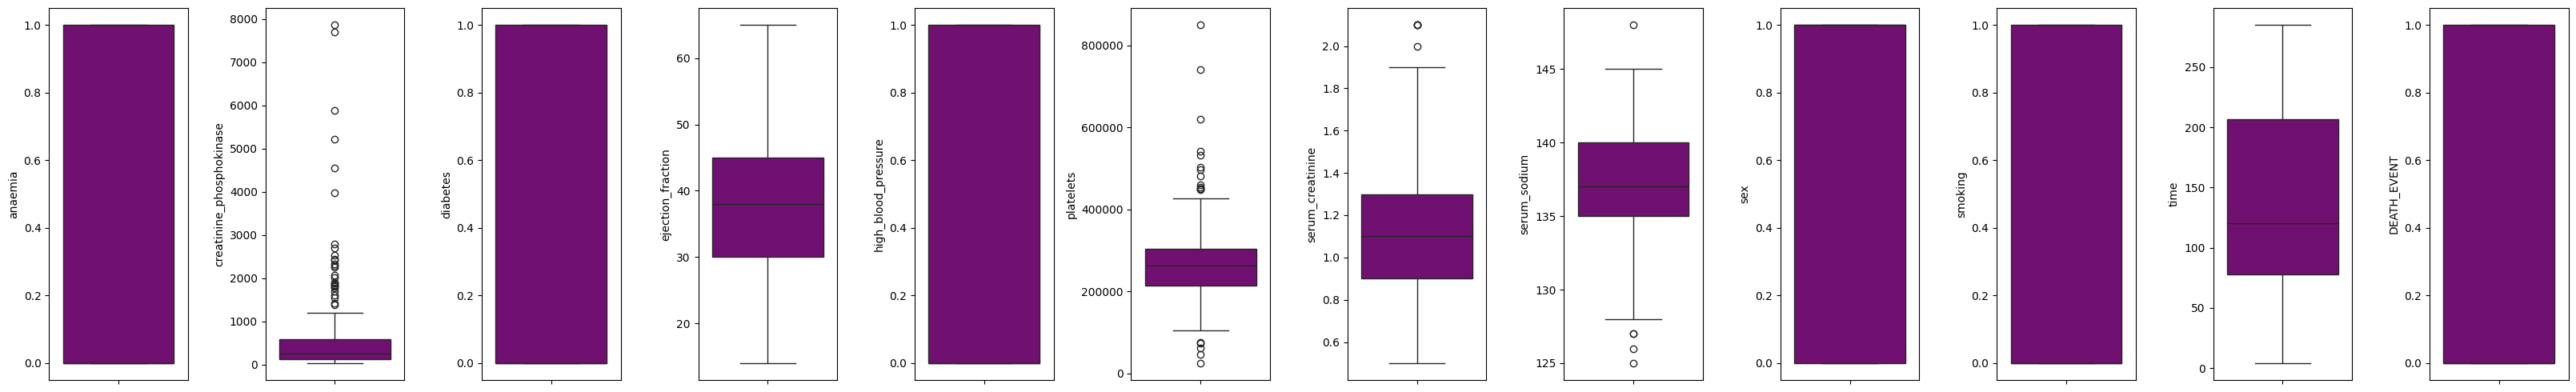

In [33]:
#visualization with no outliers
columns = df.columns

plt.figure(figsize=(35, 5))
for i in range(1, len(columns)):
    plt.subplot(1, 13, i)
    sns.boxplot(df[columns[i]], color='purple', orient='v')
    plt.tight_layout()


<Figure size 1500x1000 with 0 Axes>

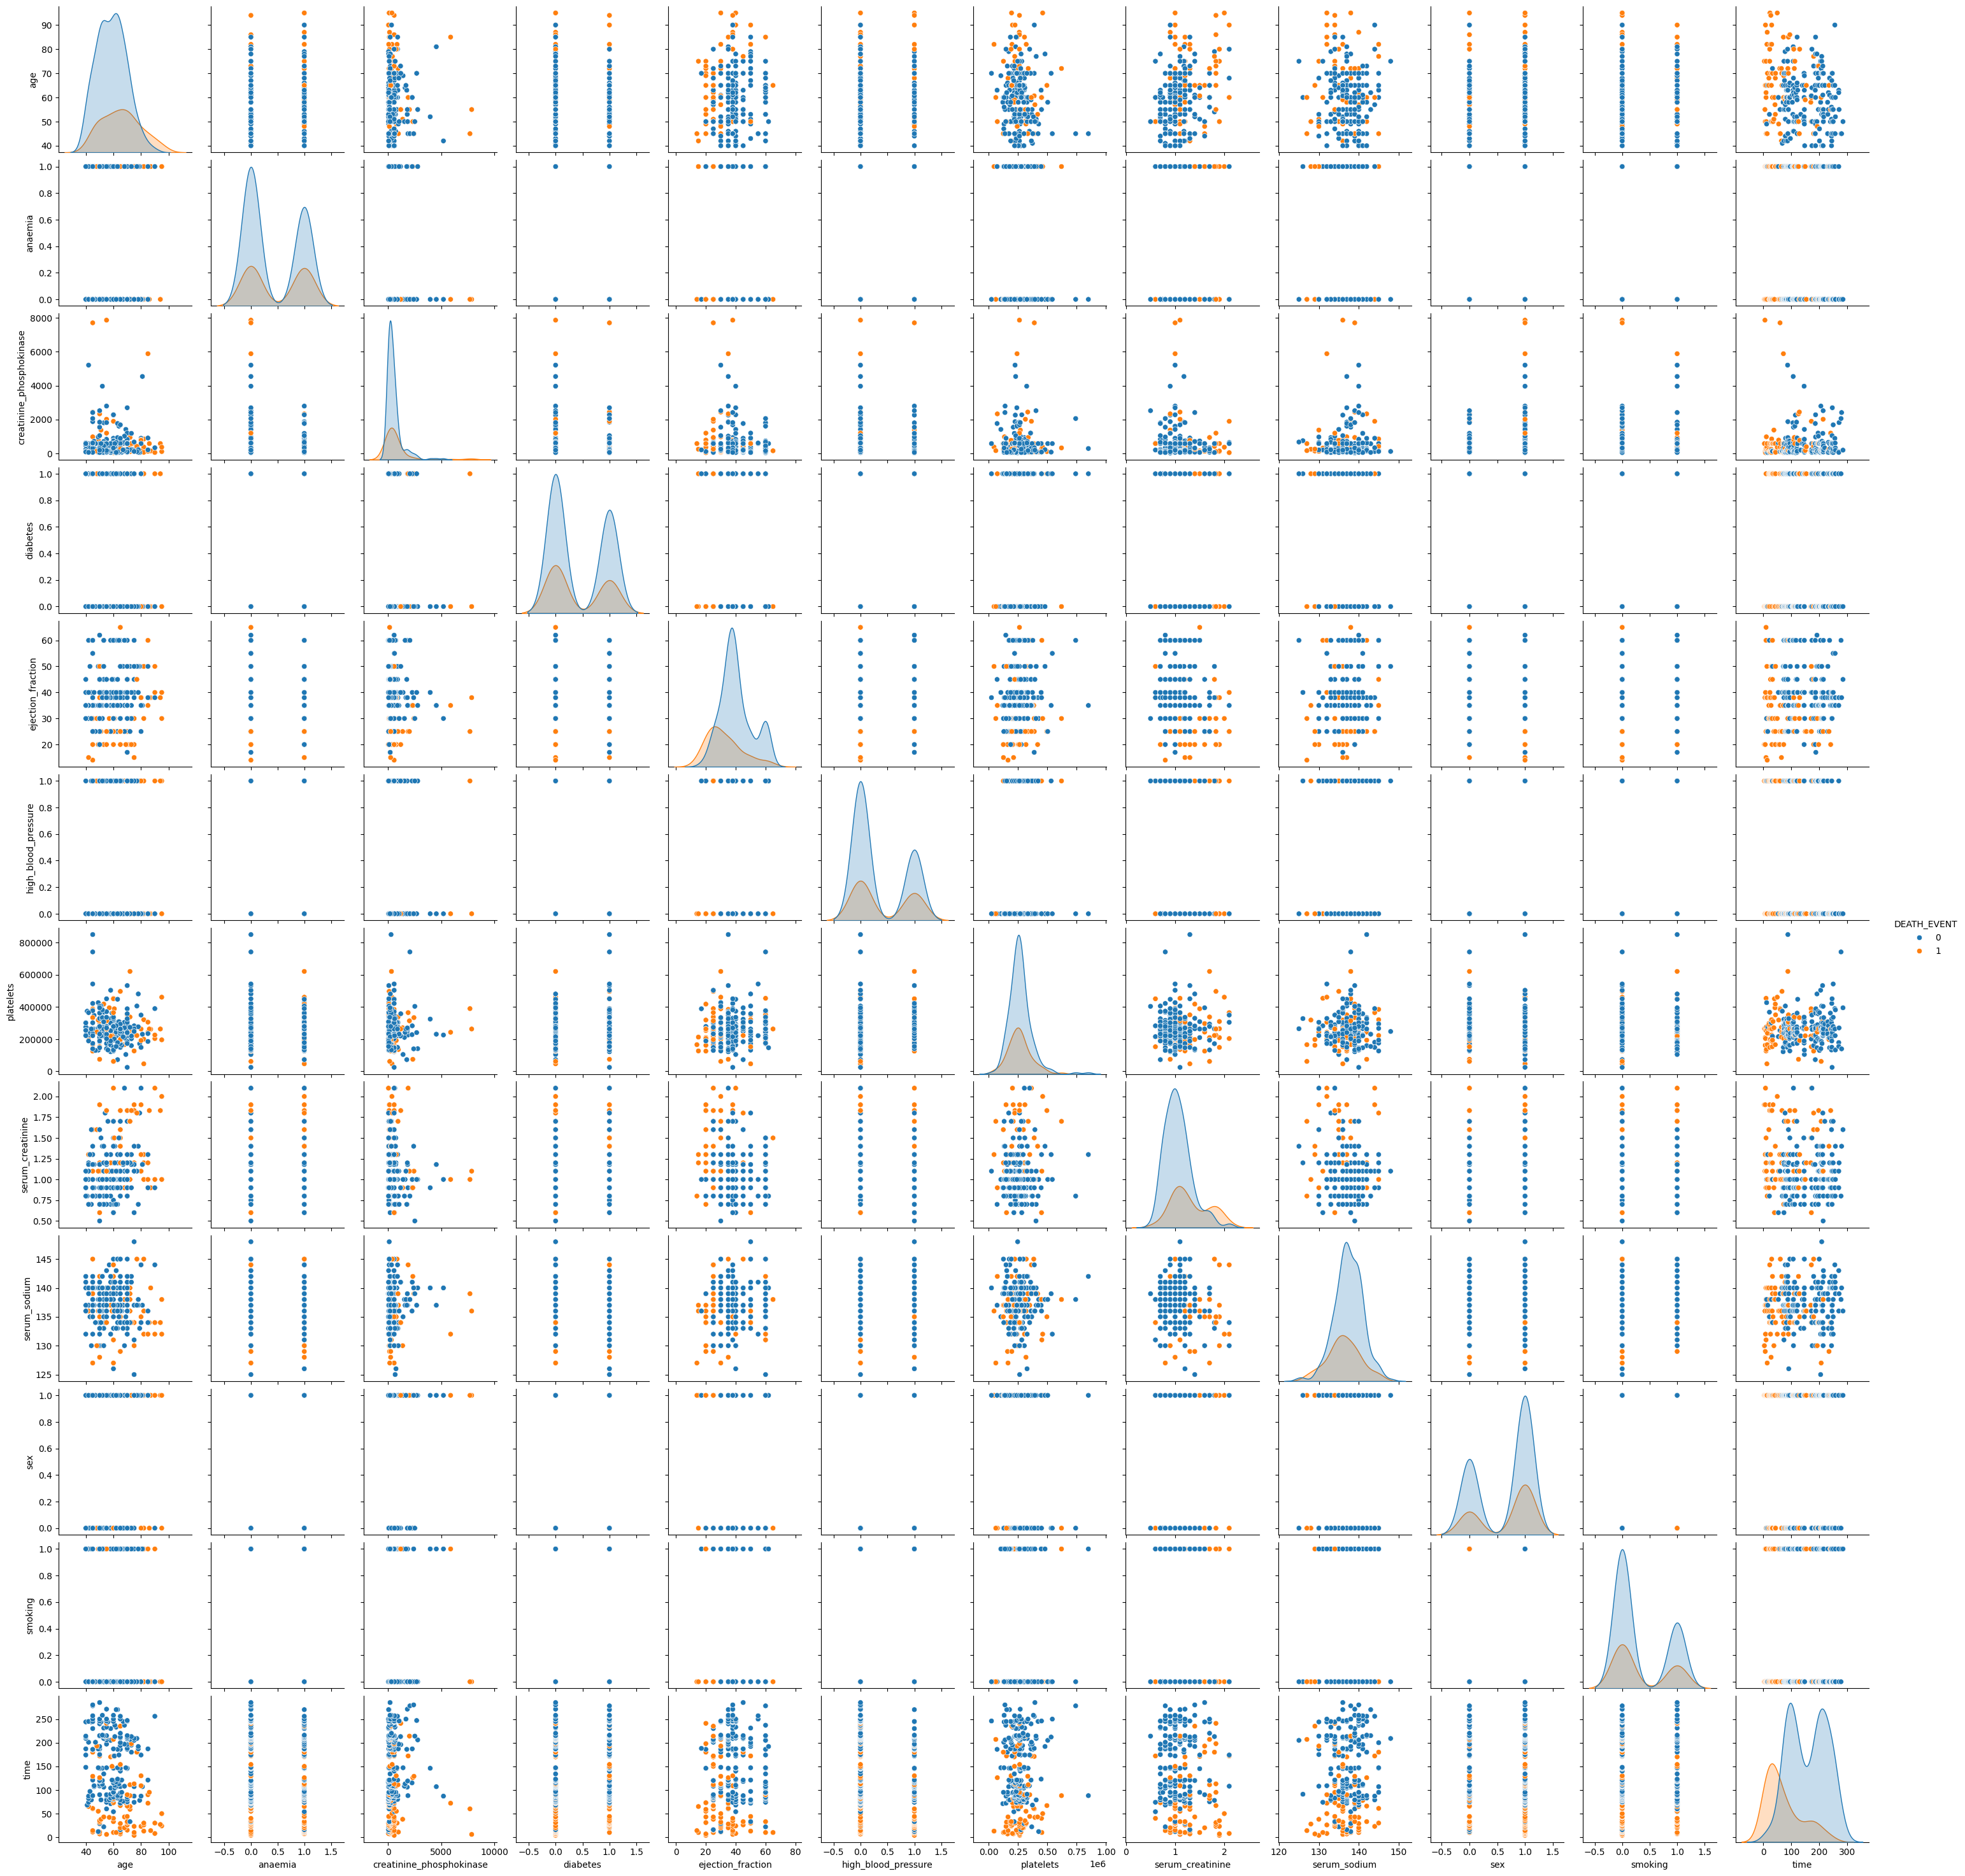

In [34]:
#pairplot
plt.figure(figsize=(15,10))
sns.pairplot(df, hue='DEATH_EVENT')
plt.show()

In [35]:
#saving the cleaned data to separate csv file

df.to_csv('cleaned_data.csv', index=False)

### The data is ready for the next step.